<a href="https://colab.research.google.com/github/plaban1981/MLZoomCamp2022/blob/main/Mlzoomcamp_2022_regression_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download the data

In [1]:
! wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2022-10-02 03:05:21--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  --.-KB/s    in 0.06s   

2022-10-02 03:05:21 (24.6 MB/s) - ‘housing.csv’ saved [1423529/1423529]



#### The goal of this homework is to create a regression model for predicting housing prices (column **'median_house_value'**).

## Import necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Load the Data

In [3]:
df = pd.read_csv("/content/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## EDA
Look at the median_house_value variable. Does it have a long tail?

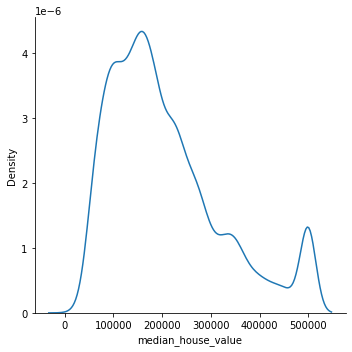

In [4]:
sns.displot(df['median_house_value'],kind='kde')
plt.show()

## Features
For the rest of the homework, you'll need to use only these columns:

['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value']

Select only them.

In [5]:
select_cols = ["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", 
               "median_income", "median_house_value"]
df = df[select_cols]
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


## Question 1

* Find a feature with missing values. How many missing values does it have?

In [6]:
df.isnull().sum()[df.isnull().sum() > 0]

total_bedrooms    207
dtype: int64

## Question 2

* What's the median (50% percentile) for variable 'population'?

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [8]:
np.median(df['population'])

1166.0

## Split the data

* Shuffle the initial dataset, use seed 42.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Make sure that the target value ('median_house_value') is not in your dataframe.
* Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test= train_test_split(df,test_size=0.20,random_state=42)
X_train,X_val = train_test_split(X_train,test_size=0.20,random_state=42)

In [26]:
print(X_train.shape,X_val.shape,X_test.shape)

(13209, 9) (3303, 9) (4128, 9)


In [27]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
16490,-120.97,38.00,27.0,1683.0,288.0,873.0,258.0,4.7069,176900.0
6090,-117.87,34.10,15.0,6409.0,1363.0,3359.0,1267.0,3.8750,173300.0
10973,-117.85,33.76,26.0,2312.0,525.0,1273.0,437.0,2.8828,204700.0
17287,-119.74,34.35,34.0,1664.0,292.0,705.0,257.0,5.0000,329400.0
12615,-121.51,38.50,25.0,4719.0,745.0,1857.0,739.0,5.0371,180200.0


In [28]:
Xtrain = X_train.drop('median_house_value',axis=1)
ytrain = X_train['median_house_value']
#
Xval = X_val.drop('median_house_value',axis=1)
yval = X_val['median_house_value']
#
Xtest = X_test.drop('median_house_value',axis=1)
ytest = X_test['median_house_value']

In [29]:
ytrain = np.log1p(ytrain) 
yval = np.log1p(yval) 
ytest = np.log1p(ytest) 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


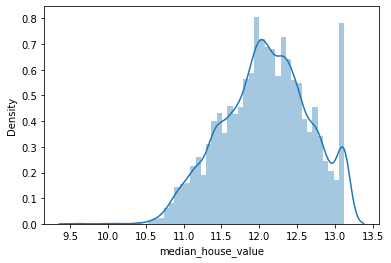

In [14]:
sns.distplot(ytrain)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


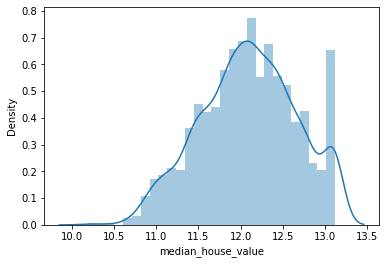

In [15]:
sns.distplot(yval)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


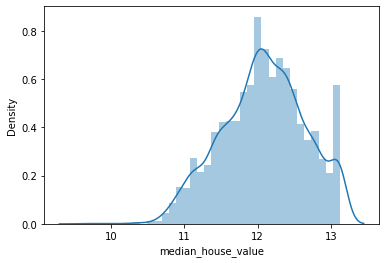

In [16]:
sns.distplot(ytest)

## Question 3

* We need to deal with missing values for the column from Q1.

*  We have two options: fill it with 0 or with the mean of this variable.

*Try both options. For each, train a linear regression model without regularization using the code from the lessons.

*For computing the mean, use the training only!

* Use the validation dataset to evaluate the models and compare the RMSE of each option.

* Round the RMSE scores to 2 decimal digits using round(score, 2)

####  Which option gives better RMSE?
Options:

* With 0
* With mean
* Both are equally good

In [30]:
Xtrian_zero = Xtrain.copy()
Xval_zero = Xval.copy()
Xtest_zero = Xtest.copy()

In [31]:
#fill missing values with 0
Xtrian_zero['total_bedrooms'] = Xtrian_zero['total_bedrooms'].fillna(0)
Xval_zero['total_bedrooms'] = Xval_zero['total_bedrooms'].fillna(0)
Xtest_zero['total_bedrooms'] = Xtest_zero['total_bedrooms'].fillna(0)

## Train Model

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(Xtrian_zero,ytrain)

LinearRegression()

In [34]:
y_pred = lr.predict(Xval_zero)

In [35]:
print(f'RMSE score with imputing null values with 0 : {round(np.sqrt(mean_squared_error(yval,y_pred)),2)}')

RMSE score with imputing null values with 0 : 0.34


In [36]:
Xtrian_mean = Xtrain.copy()
Xval_mean = Xval.copy()
Xtest_mean = Xtest.copy()

In [37]:
#fill missing values with mean
Xtrian_mean['total_bedrooms'] = Xtrian_mean['total_bedrooms'].fillna( Xtrian_mean['total_bedrooms'].mean())
Xval_mean['total_bedrooms'] = Xval_mean['total_bedrooms'].fillna( Xtrian_mean['total_bedrooms'].mean())
Xtest_mean['total_bedrooms'] = Xtest_mean['total_bedrooms'].fillna( Xtrian_mean['total_bedrooms'].mean())

In [38]:
lr = LinearRegression()
lr.fit(Xtrian_mean,ytrain)

LinearRegression()

In [39]:
y_pred = lr.predict(Xval_mean)
print(f'RMSE score with imputing null values with mean : {round(np.sqrt(mean_squared_error(yval,y_pred)),2)}')

RMSE score with imputing null values with mean : 0.34


#### Note : Bot the imputation method yields the same RMSE score

## Question 4

Now let's train a regularized linear regression.

* For this question, fill the NAs with 0.
* Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which r gives the best RMSE?

* If there are multiple options, select the smallest r.

    - Options:

       - 0
       - 0.000001
       - 0.001
       - 0.0001

In [45]:
for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
  lr.fit(Xtrian_zero,ytrain,sample_weight=r)
  y_pred = lr.predict(Xval_zero)
  print(f'RMSE score with imputing null values with 0  for r value {r}: {round(np.sqrt(mean_squared_error(yval,y_pred)),2)}')

RMSE score with imputing null values with 0  for r value 1e-06: 0.34
RMSE score with imputing null values with 0  for r value 0.0001: 0.34
RMSE score with imputing null values with 0  for r value 0.001: 0.34
RMSE score with imputing null values with 0  for r value 0.01: 0.34
RMSE score with imputing null values with 0  for r value 0.1: 0.34
RMSE score with imputing null values with 0  for r value 1: 0.34
RMSE score with imputing null values with 0  for r value 5: 0.34
RMSE score with imputing null values with 0  for r value 10: 0.34


* smallest value of r is 0

## Question 5
* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
* What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
* Round the result to 3 decimal digits (round(std, 3))

#### Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

#### Options:

* 0.16
* 0.00005
* 0.005
* 0.15555

In [52]:
scores = []
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
  X_train,X_test= train_test_split(df,test_size=0.20,random_state=seed)
  X_train,X_val = train_test_split(X_train,test_size=0.20,random_state=seed)
  # 
  Xtrain = X_train.drop('median_house_value',axis=1)
  ytrain = X_train['median_house_value']
  #
  Xval = X_val.drop('median_house_value',axis=1)
  yval = X_val['median_house_value']
  #
  Xtest = X_test.drop('median_house_value',axis=1)
  ytest = X_test['median_house_value']
  #
  y_train_orig = ytrain.values
  y_val_orig = yval.values
  y_test_orig = ytest.values
  #
  ytrain = np.log1p(y_train_orig)
  yval = np.log1p(y_val_orig)
  ytest = np.log1p(y_test_orig)
  #
  Xtrian_zero = Xtrain.copy()
  Xval_zero = Xval.copy()
  Xtest_zero = Xtest.copy()
  #fill missing values with 0
  Xtrian_zero['total_bedrooms'] = Xtrian_zero['total_bedrooms'].fillna(0)
  Xval_zero['total_bedrooms'] = Xval_zero['total_bedrooms'].fillna(0)
  Xtest_zero['total_bedrooms'] = Xtest_zero['total_bedrooms'].fillna(0)
  #
  lr.fit(Xtrian_zero,ytrain)
  #
  y_pred = lr.predict(Xval_zero)
  print(f"seed :{seed} RMSE : {round(np.sqrt(mean_squared_error(yval,y_pred)),2)}")
  scores.append(round(np.sqrt(mean_squared_error(yval,y_pred)),2))

print(f"standard deviation of scores : {round(np.std(scores),3)}")


seed :0 RMSE : 0.35
seed :1 RMSE : 0.34
seed :2 RMSE : 0.34
seed :3 RMSE : 0.34
seed :4 RMSE : 0.34
seed :5 RMSE : 0.34
seed :6 RMSE : 0.35
seed :7 RMSE : 0.35
seed :8 RMSE : 0.34
seed :9 RMSE : 0.34
standard deviation of scores : 0.005


* standard deviation is 0.005

## Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with r=0.001.

#### What's the RMSE on the test dataset?
    * Options:

      - 0.35
      - 0.135
      - 0.450
      - 0.245

In [55]:
r=0.001
X_train,X_test= train_test_split(df,test_size=0.20,random_state=9)
# 
Xtrain = X_train.drop('median_house_value',axis=1)
ytrain = X_train['median_house_value']
#
Xtest = X_test.drop('median_house_value',axis=1)
ytest = X_test['median_house_value']

#
ytrain = np.log1p(ytrain)
ytest = np.log1p(ytest)
#
Xtrian_zero = Xtrain.copy()
Xtest_zero = Xtest.copy()
#fill missing values with 0
Xtrian_zero['total_bedrooms'] = Xtrian_zero['total_bedrooms'].fillna(0)
Xtest_zero['total_bedrooms'] = Xtest_zero['total_bedrooms'].fillna(0)
#
lr.fit(Xtrian_zero,ytrain,sample_weight=r)
#
y_pred = lr.predict(Xtest_zero)
print(f"seed :{seed} RMSE : {round(np.sqrt(mean_squared_error(ytest,y_pred)),2)}")

seed :9 RMSE : 0.34
